In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
df.shape

(1460, 81)

In [5]:
# Read the train.csv file.
# usecols is used to load specific columns into dataframe.
# dropna() method allows to remove rows and column with null/nan values.
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"])

In [6]:
# Print No. of rows and columns.
df.shape

(1460, 10)

In [7]:
#sum of all null values in each column
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
Street           0
LotShape         0
YearBuilt        0
1stFlrSF         0
2ndFlrSF         0
SalePrice        0
dtype: int64

In [8]:
# count of each value
df['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [9]:
# replace the nan values with the mean of the column
df['LotFrontage'].fillna((df['LotFrontage'].mean()),inplace=True)

In [10]:
df['LotFrontage'].value_counts(dropna=False)

70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
             ... 
106.000000      1
38.000000       1
140.000000      1
138.000000      1
137.000000      1
Name: LotFrontage, Length: 111, dtype: int64

In [11]:
# Print the rows.
df.head(20)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.000000,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.000000,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.000000,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.000000,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.000000,14260,Pave,IR1,2000,1145,1053,250000
5,50,RL,85.000000,14115,Pave,IR1,1993,796,566,143000
6,20,RL,75.000000,10084,Pave,Reg,2004,1694,0,307000
7,60,RL,70.049958,10382,Pave,IR1,1973,1107,983,200000
8,50,RM,51.000000,6120,Pave,Reg,1931,1022,752,129900
9,190,RL,50.000000,7420,Pave,Reg,1939,1077,0,118000


In [12]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1460 non-null   int64  
 1   MSZoning     1460 non-null   object 
 2   LotFrontage  1460 non-null   float64
 3   LotArea      1460 non-null   int64  
 4   Street       1460 non-null   object 
 5   LotShape     1460 non-null   object 
 6   YearBuilt    1460 non-null   int64  
 7   1stFlrSF     1460 non-null   int64  
 8   2ndFlrSF     1460 non-null   int64  
 9   SalePrice    1460 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 114.2+ KB


In [13]:
# Print unique values present in each column.
# str.format() is one of the string formatting methods in Python3, which allows multiple substitutions and value formatting. This method lets us concatenate elements within a string through positional formatting.
# Syntax used here: { } { } .format(value1, value2)
# unique() method is used to know all type of unique values in each column.
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 111
Column name LotArea and unique values are 1073
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 753
Column name 2ndFlrSF and unique values are 417
Column name SalePrice and unique values are 663


From above it seems that MSSubclass, MSZoning , Street and LotShape can be converted to categorical features. Since there unique value count is less than 50.

In [14]:
# Today's date
import datetime
datetime.datetime.now().year

2021

In [15]:
# How old is the building.
df['Total Years']=datetime.datetime.now().year- df['YearBuilt']

In [16]:
# remove the Yearbuilt column.
# axis = 1 refers to column.
# inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object. You then need to save it to something.
df.drop("YearBuilt", axis= 1, inplace = True)

Prefer how old is the house i.e Total Years instead of when the house was built i.e YearBuilt.


In [17]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,18
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,45
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,20
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,106
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,21


In [18]:
# Print column names
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [19]:
# Creating Categorical features.
categorical_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature="SalePrice"

In [20]:
# print the uniques value of each categorical_features.
print(df['MSSubClass'].unique(),
df['MSZoning'].unique(),
df['Street'].unique(),
df['LotShape'].unique())

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] ['RL' 'RM' 'C (all)' 'FV' 'RH'] ['Pave' 'Grvl'] ['Reg' 'IR1' 'IR2' 'IR3']


MSSubClass has 15 unique values repeated all over the MSSubClass record likewise for other columns also.
Thesecolumns has different data type. We need to convert it into categorical features and for that we will use 
label encoding.


**Label Encoding** refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.


In [21]:
# For example- Use label encoding for MSSubClass.
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
# label_encoder object knows how to understand word labels. 
lbl_encoders["MSSubClass"]=LabelEncoder()
# Encode labels in column 'MSSubclass'.
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [22]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [23]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
# Apply Label encoding for every faeature in categorical feature list.
for feature in categorical_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [24]:
# Print dataframe
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,18
1,0,3,80.0,9600,1,3,1262,0,181500,45
2,5,3,68.0,11250,1,0,920,866,223500,20
3,6,3,60.0,9550,1,0,961,756,140000,106
4,5,3,84.0,14260,1,0,1145,1053,250000,21
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,22
1456,0,3,85.0,13175,1,3,2073,0,210000,43
1457,6,3,66.0,9042,1,3,1188,1152,266500,80
1458,0,3,68.0,9717,1,3,1078,0,142125,71


Categorical features are label encoded now.

In [25]:
# Stacking and Converting Into Tensors.
# numpy.stack() function is used to join a sequence of same dimension arrays along a new axis.The axis parameter specifies the index of the new axis in the dimensions of the result. For example, if axis=0 it will be the first dimension and if axis=-1 it will be the last dimension.
# Syntax : numpy.stack(arrays, axis)
categorical_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
categorical_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

We created a numpy array above.

In [26]:
# Convert numpy to Tensors
import torch
categorical_features=torch.tensor(categorical_features,dtype=torch.int64)
categorical_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [27]:
categorical_features.shape

torch.Size([1460, 4])

In [28]:
# create continuous variable
# Create a null list.
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        # SalePrice is also included cause it is a dependent feature.
        # The pass statement in Python is used when a statement is required syntactically but you do not want any command or code to execute. The pass statement is a null operation; nothing happens when it executes.
        pass
    else:
        cont_features.append(i)

In [29]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [30]:
# Stacking continuous variable into a numpy array and coverting it into a tensor.
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    18.],
        [   80.,  9600.,  1262.,     0.,    45.],
        [   68., 11250.,   920.,   866.,    20.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    80.],
        [   68.,  9717.,  1078.,     0.,    71.],
        [   75.,  9937.,  1256.,     0.,    56.]])

In [31]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    18.],
        [   80.,  9600.,  1262.,     0.,    45.],
        [   68., 11250.,   920.,   866.,    20.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    80.],
        [   68.,  9717.,  1078.,     0.,    71.],
        [   75.,  9937.,  1256.,     0.,    56.]])

In [32]:
cont_values.dtype

torch.float32

In [33]:
# Dependent Feature.
# reshape the tensor otherwise it will give 1D tensor.
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1460 non-null   int64  
 1   MSZoning     1460 non-null   int64  
 2   LotFrontage  1460 non-null   float64
 3   LotArea      1460 non-null   int64  
 4   Street       1460 non-null   int64  
 5   LotShape     1460 non-null   int64  
 6   1stFlrSF     1460 non-null   int64  
 7   2ndFlrSF     1460 non-null   int64  
 8   SalePrice    1460 non-null   int64  
 9   Total Years  1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [35]:
categorical_features.shape,cont_values.shape,y.shape

(torch.Size([1460, 4]), torch.Size([1460, 5]), torch.Size([1460, 1]))

# **Embedding size** for categorical column

# **Embeddings**
An embedding is a relatively low-dimensional space into which you can translate high-dimensional vectors. Embeddings make it easier to do machine learning on large inputs like sparse vectors representing words. Ideally, an embedding captures some of the semantics of the input by placing semantically similar inputs close together in the embedding space. An embedding can be learned and reused across models. To overcome the problem of  sparse matrix (many zeros and 1) when it come to large dataset we use embedding.


**Embedding layer** -

One can imagine the Embedding layer as a simple matrix multiplication that transforms words into their corresponding word embeddings OR turns positive integers (indexes) into dense vectors of fixed size.
 Input dimension has to be equal to the number of unique word.
![](http://)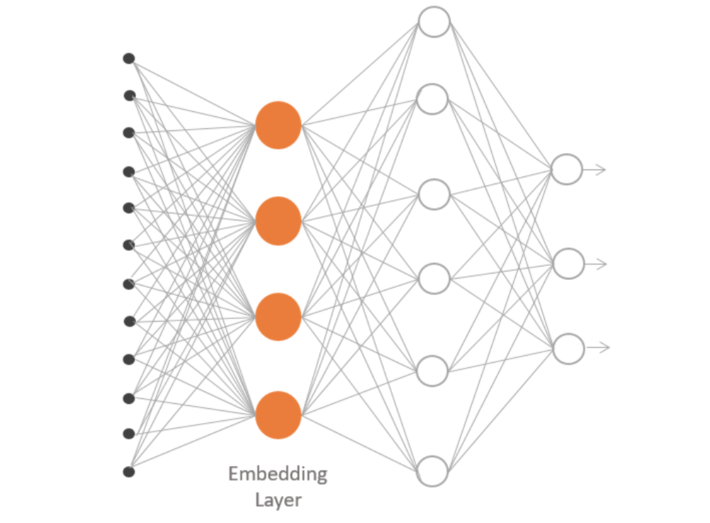

In [36]:
# Categorical dimension - the array contains no. of unique values for each feature.
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]

In [37]:
# Print the categorical dimension.
cat_dims

[15, 5, 2, 4]

In [38]:
#The rule of thumb for determining the embedding size is the cardinality(no. of unique vaues) size divided by 2, but no bigger than 50.
# For exampke: We have 7 days of the week but on looking at DayOfWeek cardinality is 8 the extra cardinality is added just incase there is an unknown in the test set, divide that by 2, thus the 4 random numbers. Even if there were no missing values in the original data, you should still set aside one for unknown just in case.
# embedding_dim - size of embedding for categorical variable.
# By having higher dimensionality vector rather than just a single number, it gives the deep learning network a chance to learn these rich representations.
embedding_dim= [(x, min(50, (x+1 ) // 2)) for x in cat_dims]

In [39]:
#Print the embedding dimension.
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# nn.Embedding - This module is often used to store word embeddings and retrieve them using indices. The input to the module is a list of indices, and the output is the corresponding word embeddings.
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
# embedding layer 
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [41]:
# print label encoded categorical feature.
categorical_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [42]:
# display.max_rows:
#       Displays the default number of value. Interpreter reads this value and displays the rows with this value as upper limit to display.
pd.set_option('display.max_rows', 500)
# Create a null list. It will store the indices of a value of columns of tensor. 
embedding_val=[]
# Here i represent the column of tensor. In categorical_feature each column represent its respective feature.
# 'e' coverts the input size of embedding layer to the require output size.
#Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.
for i,e in enumerate(embed_representation):
    embedding_val.append(e(categorical_features[:,i]))

In [43]:
cat_featuresz=categorical_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [44]:
# Print the embedded values.
embedding_val

[tensor([[-0.3181, -1.3311,  0.8591,  ...,  1.3429,  0.3093,  1.4959],
         [ 0.7157,  0.0599,  1.1157,  ...,  0.2792,  1.0854,  0.3932],
         [-0.3181, -1.3311,  0.8591,  ...,  1.3429,  0.3093,  1.4959],
         ...,
         [ 0.2703,  0.6938, -0.8743,  ..., -1.6640, -0.3914, -1.0071],
         [ 0.7157,  0.0599,  1.1157,  ...,  0.2792,  1.0854,  0.3932],
         [ 0.7157,  0.0599,  1.1157,  ...,  0.2792,  1.0854,  0.3932]],
        grad_fn=<EmbeddingBackward>),
 tensor([[ 0.5874, -0.2826, -0.9409],
         [ 0.5874, -0.2826, -0.9409],
         [ 0.5874, -0.2826, -0.9409],
         ...,
         [ 0.5874, -0.2826, -0.9409],
         [ 0.5874, -0.2826, -0.9409],
         [ 0.5874, -0.2826, -0.9409]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.9712],
         [-0.9712],
         [-0.9712],
         ...,
         [-0.9712],
         [-0.9712],
         [-0.9712]], grad_fn=<EmbeddingBackward>),
 tensor([[ 0.2017,  1.4339],
         [ 0.2017,  1.4339],
         [-0.7543,  0.987

The first vector denotes 5 , second denotes 0 , third denotes 5 again and so on.
"5" is distributed into 8 indices according to the embedding layer for first categorical feature i.e (15,8).
Therefore creating a tensor for each categorical feature.

In [45]:
# Arrange the 4 tensors in one tensor in 4 column. Concatenating the 4 tensors.
z = torch.cat(embedding_val, 1)
z

tensor([[-0.3181, -1.3311,  0.8591,  ..., -0.9712,  0.2017,  1.4339],
        [ 0.7157,  0.0599,  1.1157,  ..., -0.9712,  0.2017,  1.4339],
        [-0.3181, -1.3311,  0.8591,  ..., -0.9712, -0.7543,  0.9878],
        ...,
        [ 0.2703,  0.6938, -0.8743,  ..., -0.9712,  0.2017,  1.4339],
        [ 0.7157,  0.0599,  1.1157,  ..., -0.9712,  0.2017,  1.4339],
        [ 0.7157,  0.0599,  1.1157,  ..., -0.9712,  0.2017,  1.4339]],
       grad_fn=<CatBackward>)

# **Dropout** - 

The term “dropout” refers to dropping out units (both hidden and visible) in a neural network. Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. Dropout is a regularization technique for reducing overfitting in artificial neural networks by preventing complex co-adaptations on training data. It is an efficient way of performing model averaging with neural networks.

# **Batch Normalization** - 

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [46]:
# Implement dropupout
droput=nn.Dropout(.4)

In [47]:
# Perform the dropout on concatenated tensor i.e z
final_embed=droput(z)
final_embed

tensor([[-0.0000, -2.2185,  1.4318,  ..., -1.6186,  0.3362,  0.0000],
        [ 1.1928,  0.0998,  1.8596,  ..., -1.6186,  0.3362,  0.0000],
        [-0.5302, -2.2185,  1.4318,  ..., -1.6186, -0.0000,  1.6463],
        ...,
        [ 0.0000,  0.0000, -0.0000,  ..., -1.6186,  0.3362,  0.0000],
        [ 1.1928,  0.0998,  0.0000,  ..., -1.6186,  0.0000,  2.3898],
        [ 0.0000,  0.0998,  0.0000,  ..., -1.6186,  0.3362,  0.0000]],
       grad_fn=<MulBackward0>)

# **Neural Network** - 
 
 
 A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria

To create a DL model perform all the above steps inside NN. 

In [48]:
seed = 20
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [49]:
torch.cuda.is_available()


True

In [50]:
torch.cuda.get_device_name()

'Tesla P100-PCIE-16GB'

In [51]:
torch.cuda.device_count()

1

In [52]:
torch.cuda.current_device()


0

In [53]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [54]:
# Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
# Define a class for model.
class FeedForwardNN(nn.Module):
    
    # function contains embedding dimension, no. of continuous values, output, layers and dropout value.
    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        # Create a module list for embedding layers.
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        # n_emb = embedding dimension, n_cont = no.of continuous values.
        n_emb = sum((out for inp,out in embedding_dim))
        # n_in = input.
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            # Since our input is a 1D array we will use BatchNorm1d class present in the Pytorch nn module.
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        # emedding the categorical features.
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x


In [55]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [56]:
torch.manual_seed(100)
# h1 = 100 neurons , h2 = 50 neurons
model=FeedForwardNN(embedding_dim,len(cont_features),1,[ 100,50],p=0.1).to(DEVICE)

In [57]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [58]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [59]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

**Define loss and optimizer**

In [60]:
df.shape

(1460, 10)

In [61]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    18.],
        [   80.,  9600.,  1262.,     0.,    45.],
        [   68., 11250.,   920.,   866.,    20.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    80.],
        [   68.,  9717.,  1078.,     0.,    71.],
        [   75.,  9937.,  1256.,     0.,    56.]])

In [62]:
cont_values.shape

torch.Size([1460, 5])

In [63]:
# train and test split
batch_size=1200
# take 15 % of of train data as test data.
test_size=int(batch_size*0.15)
train_categorical=categorical_features[:batch_size-test_size].to(DEVICE)
test_categorical=categorical_features[batch_size-test_size:batch_size].to(DEVICE)
train_cont=cont_values[:batch_size-test_size].to(DEVICE)
test_cont=cont_values[batch_size-test_size:batch_size].to(DEVICE)
y_train=y[:batch_size-test_size].to(DEVICE)
y_test=y[batch_size-test_size:batch_size].to(DEVICE)

In [64]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [65]:
import torch.nn as nn
epochs= 5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train))### RMSE
    print(loss)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    #clear old gradient from the last step.
    optimizer.zero_grad()
    # compute the derivative of the loss w.r.t parameter 
    loss.backward()
    # step() updates the parameters
    optimizer.step()

tensor(198494.8750, device='cuda:0', grad_fn=<SqrtBackward>)
Epoch number: 1 and the loss : 198494.875
tensor(198494.3438, device='cuda:0', grad_fn=<SqrtBackward>)
tensor(198493.9844, device='cuda:0', grad_fn=<SqrtBackward>)
tensor(198493.6875, device='cuda:0', grad_fn=<SqrtBackward>)
tensor(198493.4062, device='cuda:0', grad_fn=<SqrtBackward>)
tensor(198493.1250, device='cuda:0', grad_fn=<SqrtBackward>)
tensor(198492.8125, device='cuda:0', grad_fn=<SqrtBackward>)
tensor(198492.5156, device='cuda:0', grad_fn=<SqrtBackward>)
tensor(198492.1875, device='cuda:0', grad_fn=<SqrtBackward>)
tensor(198491.8750, device='cuda:0', grad_fn=<SqrtBackward>)
tensor(198491.5469, device='cuda:0', grad_fn=<SqrtBackward>)
Epoch number: 11 and the loss : 198491.546875
tensor(198491.1719, device='cuda:0', grad_fn=<SqrtBackward>)
tensor(198490.8125, device='cuda:0', grad_fn=<SqrtBackward>)
tensor(198490.4375, device='cuda:0', grad_fn=<SqrtBackward>)
tensor(198490.0625, device='cuda:0', grad_fn=<SqrtBackward

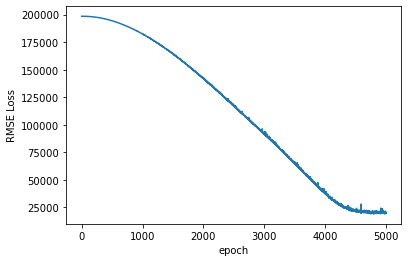

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [67]:
test_categorical,test_cont = test_categorical.to(DEVICE),test_cont.to(DEVICE)

In [68]:
y_pred,y_test = y_pred.to(DEVICE),y_test.to(DEVICE)

In [69]:
# Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 38687.546875


In [70]:
y_pred

tensor([[186588.3125],
        [217282.6406],
        [111926.9922],
        [172074.0781],
        [383382.3750],
        [113199.4141],
        [136159.0938],
        [283455.0000],
        [127381.3594],
        [109256.8047],
        [150384.5781],
        [269677.4375],
        [291282.5625],
        [200102.7344],
        [102051.9844],
        [130166.3750],
        [310329.7188],
        [246181.0781],
        [115831.3359],
        [ 90931.6953],
        [179050.0625],
        [159625.8906],
        [233450.9062],
        [317949.2812],
        [242950.1719],
        [207779.2969],
        [410432.8438],
        [154281.1719],
        [247415.4219],
        [125824.1719],
        [193527.6406],
        [209962.1719],
        [200344.8906],
        [151929.1250],
        [217788.7344],
        [177350.3594],
        [197480.6250],
        [233298.7812],
        [337500.2500],
        [274365.5625],
        [166273.6562],
        [ 76517.9062],
        [212485.8750],
        [ 9

In [71]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [72]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [73]:
data_predicted

,Prediction
0,186588.312500
1,217282.640625
2,111926.992188
3,172074.078125
4,383382.375000
5,113199.414062
6,136159.093750
7,283455.000000
8,127381.359375
9,109256.804688


In [74]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output["Difference"]= final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,176000.0,186588.312500,-10588.312500
1,194000.0,217282.640625,-23282.640625
2,87000.0,111926.992188,-24926.992188
3,191000.0,172074.078125,18925.921875
4,287000.0,383382.375000,-96382.375000


In [75]:
# Save the model
torch.save(model,'HousePrice.pt')

In [76]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [77]:
# Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.1).to(DEVICE)

In [78]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [79]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [80]:
df_test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv',usecols=[ "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"])

In [81]:
df_test.shape

(1459, 9)

In [82]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF
0,20,RH,80.0,11622,Pave,Reg,1961,896,0
1,20,RL,81.0,14267,Pave,IR1,1958,1329,0
2,60,RL,74.0,13830,Pave,IR1,1997,928,701
3,60,RL,78.0,9978,Pave,IR1,1998,926,678
4,120,RL,43.0,5005,Pave,IR1,1992,1280,0


In [83]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1459 non-null   int64  
 1   MSZoning     1455 non-null   object 
 2   LotFrontage  1232 non-null   float64
 3   LotArea      1459 non-null   int64  
 4   Street       1459 non-null   object 
 5   LotShape     1459 non-null   object 
 6   YearBuilt    1459 non-null   int64  
 7   1stFlrSF     1459 non-null   int64  
 8   2ndFlrSF     1459 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 102.7+ KB


In [84]:
for i in df_test.columns:
    print("Column name {} and unique values are {}".format(i,len(df_test[i].unique())))

Column name MSSubClass and unique values are 16
Column name MSZoning and unique values are 6
Column name LotFrontage and unique values are 116
Column name LotArea and unique values are 1106
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 106
Column name 1stFlrSF and unique values are 789
Column name 2ndFlrSF and unique values are 407


In [85]:
df_test.isnull().sum()

MSSubClass       0
MSZoning         4
LotFrontage    227
LotArea          0
Street           0
LotShape         0
YearBuilt        0
1stFlrSF         0
2ndFlrSF         0
dtype: int64

MSSubClass has 16 unique values replace the least count value with one of its close value. So that MSSubClasswill have 15 unique values

In [86]:
df_test['MSSubClass'].value_counts(dropna=False)

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64

In [87]:
df_test['MSSubClass'] = df_test['MSSubClass'].replace(150,160)

In [88]:
df_test['MSSubClass'].value_counts(dropna=False)

20     543
60     276
50     143
120     95
30      70
70      68
160     66
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
Name: MSSubClass, dtype: int64

In [89]:
df_test['MSZoning'].value_counts(dropna=False)

RL         1114
RM          242
FV           74
C (all)      15
RH           10
NaN           4
Name: MSZoning, dtype: int64

In [90]:
df_test['MSZoning']=df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])

In [91]:
df_test['LotFrontage'].value_counts(dropna=False)

NaN      227
60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
65.0      49
85.0      36
24.0      30
63.0      30
21.0      27
68.0      25
74.0      24
64.0      24
90.0      23
72.0      22
62.0      22
78.0      21
82.0      16
73.0      15
59.0      14
76.0      14
56.0      14
57.0      14
53.0      14
52.0      14
81.0      12
88.0      12
100.0     12
51.0      12
66.0      11
43.0      11
79.0      11
58.0      10
35.0      10
48.0      10
44.0      10
67.0      10
110.0      9
61.0       9
84.0       9
69.0       9
91.0       8
42.0       8
41.0       8
95.0       8
83.0       8
120.0      7
71.0       7
55.0       7
45.0       7
34.0       6
102.0      6
105.0      6
94.0       6
87.0       6
96.0       6
77.0       6
93.0       5
86.0       5
30.0       5
92.0       5
39.0       5
107.0      4
54.0       4
40.0       4
89.0       4
98.0       4
106.0      3
47.0       3
112.0      3
32.0       3
108.0      3
113.0      3
125.0      3
26.0       3
97.0       3

In [92]:
df_test['LotFrontage'].fillna((df_test['LotFrontage'].mean()),inplace=True)

In [93]:
df_test['LotFrontage'].value_counts(dropna=False)

68.580357     227
60.000000     133
80.000000      68
70.000000      63
50.000000      60
75.000000      52
65.000000      49
85.000000      36
63.000000      30
24.000000      30
21.000000      27
68.000000      25
74.000000      24
64.000000      24
90.000000      23
72.000000      22
62.000000      22
78.000000      21
82.000000      16
73.000000      15
59.000000      14
57.000000      14
56.000000      14
76.000000      14
53.000000      14
52.000000      14
100.000000     12
88.000000      12
51.000000      12
81.000000      12
43.000000      11
66.000000      11
79.000000      11
35.000000      10
48.000000      10
58.000000      10
67.000000      10
44.000000      10
110.000000      9
69.000000       9
61.000000       9
84.000000       9
42.000000       8
41.000000       8
95.000000       8
91.000000       8
83.000000       8
120.000000      7
71.000000       7
45.000000       7
55.000000       7
34.000000       6
96.000000       6
87.000000       6
105.000000      6
102.000000

In [94]:
for i in df_test.columns:
    print("Column name {} and unique values are {}".format(i,len(df_test[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 116
Column name LotArea and unique values are 1106
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 106
Column name 1stFlrSF and unique values are 789
Column name 2ndFlrSF and unique values are 407


In [95]:

import datetime
datetime.datetime.now().year

2021

In [96]:
df_test['Total Years']=datetime.datetime.now().year-df_test['YearBuilt']

In [97]:
df_test.drop("YearBuilt",axis=1,inplace=True)

In [98]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'Total Years'],
      dtype='object')

In [99]:

cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]

In [100]:
lbl_encoders

{'MSSubClass': LabelEncoder(),
 'MSZoning': LabelEncoder(),
 'Street': LabelEncoder(),
 'LotShape': LabelEncoder()}

In [101]:
print(df_test['MSSubClass'].unique(),
df_test['MSZoning'].unique(),
df_test['Street'].unique(),
df_test['LotShape'].unique())

[ 20  60 120 160  80  30  50  90  85 190  45  70  75 180  40] ['RH' 'RL' 'RM' 'FV' 'C (all)'] ['Pave' 'Grvl'] ['Reg' 'IR1' 'IR2' 'IR3']


In [102]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df_test[feature]=lbl_encoders[feature].fit_transform(df_test[feature])

In [103]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,Total Years
0,0,2,80.0,11622,1,3,896,0,60
1,0,3,81.0,14267,1,0,1329,0,63
2,5,3,74.0,13830,1,0,928,701,24
3,5,3,78.0,9978,1,0,926,678,23
4,11,3,43.0,5005,1,0,1280,0,29
...,...,...,...,...,...,...,...,...,...
1454,12,4,21.0,1936,1,3,546,546,51
1455,12,4,21.0,1894,1,3,546,546,51
1456,0,3,160.0,20000,1,3,1224,0,61
1457,9,3,62.0,10441,1,3,970,0,29


In [104]:
# Stacking and Converting Into Tensors
cat_features=np.stack([df_test['MSSubClass'],df_test['MSZoning'],df_test['Street'],df_test['LotShape']],1)
cat_features

array([[0, 2, 1, 3],
       [0, 3, 1, 0],
       [5, 3, 1, 0],
       ...,
       [0, 3, 1, 3],
       [9, 3, 1, 3],
       [5, 3, 1, 3]])

In [105]:
cat_features

array([[0, 2, 1, 3],
       [0, 3, 1, 0],
       [5, 3, 1, 0],
       ...,
       [0, 3, 1, 3],
       [9, 3, 1, 3],
       [5, 3, 1, 3]])

In [106]:
# Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[0, 2, 1, 3],
        [0, 3, 1, 0],
        [5, 3, 1, 0],
        ...,
        [0, 3, 1, 3],
        [9, 3, 1, 3],
        [5, 3, 1, 3]])

In [107]:
cat_features.to(DEVICE)

tensor([[0, 2, 1, 3],
        [0, 3, 1, 0],
        [5, 3, 1, 0],
        ...,
        [0, 3, 1, 3],
        [9, 3, 1, 3],
        [5, 3, 1, 3]], device='cuda:0')

In [108]:
# create continuous variable
continuous_features=[]
for i in df_test.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape"]:
        pass
    else:
        continuous_features.append(i)

In [109]:
continuous_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [110]:
# Stacking continuous variable to a tensor
continuous_values=np.stack([df_test[i].values for i in continuous_features],axis=1)
continuous_values=torch.tensor(continuous_values,dtype=torch.float)
continuous_values

tensor([[   80., 11622.,   896.,     0.,    60.],
        [   81., 14267.,  1329.,     0.,    63.],
        [   74., 13830.,   928.,   701.,    24.],
        ...,
        [  160., 20000.,  1224.,     0.,    61.],
        [   62., 10441.,   970.,     0.,    29.],
        [   74.,  9627.,   996.,  1004.,    28.]])

In [111]:
continuous_values.to(DEVICE)

tensor([[   80., 11622.,   896.,     0.,    60.],
        [   81., 14267.,  1329.,     0.,    63.],
        [   74., 13830.,   928.,   701.,    24.],
        ...,
        [  160., 20000.,  1224.,     0.,    61.],
        [   62., 10441.,   970.,     0.,    29.],
        [   74.,  9627.,   996.,  1004.,    28.]], device='cuda:0')

In [112]:
# Embedding Size For Categorical columns
categorical_dims=[len(df_test[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]

In [113]:
categorical_dims

[15, 5, 2, 4]

In [114]:
embedding_dimensions= [(x, min(50, (x + 1) // 2)) for x in categorical_dims]
                                        
                       

In [115]:
embedding_dimensions

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [116]:
cat_features,continuous_values = cat_features.to(DEVICE),continuous_values.to(DEVICE)

In [117]:
y_pred1=""
with torch.no_grad():
    y_pred1=model1(cat_features,continuous_values)

In [118]:
y_pred1

tensor([[106429.5625],
        [161946.6562],
        [195097.9844],
        ...,
        [175286.5000],
        [146087.3281],
        [219063.8281]], device='cuda:0')

In [119]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [120]:
len(cat_features),len(continuous_values)

(1459, 1459)

In [121]:
y_pred1

tensor([[106429.5625],
        [161946.6562],
        [195097.9844],
        ...,
        [175286.5000],
        [146087.3281],
        [219063.8281]], device='cuda:0')

In [122]:
result=pd.DataFrame(y_pred1.tolist(),columns=["SalePrice"])

In [123]:
result

,SalePrice
0,106429.562500
1,161946.656250
2,195097.984375
3,192230.593750
4,172799.468750
...,...
1454,95308.476562
1455,95259.031250
1456,175286.500000
1457,146087.328125


In [124]:
result['Id'] = np.array(result.index)


In [125]:
result['Id'] = result['Id'] + 1461


In [126]:
result = pd.DataFrame(result, columns=['Id', 'SalePrice'])


In [127]:
result

,Id,SalePrice
0,1461,106429.562500
1,1462,161946.656250
2,1463,195097.984375
3,1464,192230.593750
4,1465,172799.468750
...,...,...
1454,2915,95308.476562
1455,2916,95259.031250
1456,2917,175286.500000
1457,2918,146087.328125


In [128]:
result.to_csv('submission.csv', columns=['Id', 'SalePrice'], index=False)